## Import Libraries

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import pytesseract

## Preprocessing data

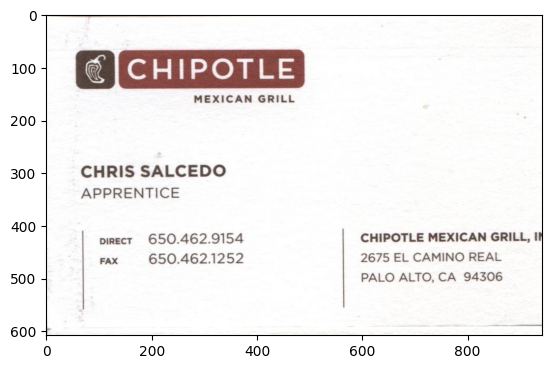

In [70]:
img_1 = cv2.imread("data/002.jpg")
plt.imshow(img_1[:,:,::-1])

In [71]:
#Collecting text from image
text = pytesseract.image_to_string(img_1)

In [72]:
print(text)

€| CHIPOTLE

MEXICAN GRILL

CHRIS SALCEDO
APPRENTICE

orect 650.462.9154
FAX 650.462.1252

CHIPOTLE MEXICAN GRILL, I!

2675 EL CAMINO REAL
PALO ALTO, CA 94306



In [73]:
data = pytesseract.image_to_data('data/002.jpg') #Collecting data

In [74]:
print(data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	942	608	-1	
2	1	1	0	0	0	2	0	356	16	-1	
3	1	1	1	0	0	2	0	356	16	-1	
4	1	1	1	1	0	2	0	356	16	-1	
5	1	1	1	1	1	2	0	356	16	95.000000	 
2	1	2	0	0	0	75	78	396	53	-1	
3	1	2	1	0	0	75	78	396	53	-1	
4	1	2	1	1	0	75	78	396	53	-1	
5	1	2	1	1	1	75	78	396	53	44.200863	@|CHIPOTLE
2	1	3	0	0	0	282	153	190	15	-1	
3	1	3	1	0	0	282	153	190	15	-1	
4	1	3	1	1	0	282	153	190	15	-1	
5	1	3	1	1	1	282	154	108	14	96.838005	MEXICAN
5	1	3	1	1	2	403	153	69	15	95.836235	GRILL
2	1	4	0	0	0	67	285	274	65	-1	
3	1	4	1	0	0	67	285	274	65	-1	
4	1	4	1	1	0	67	285	274	25	-1	
5	1	4	1	1	1	67	286	101	24	96.720421	CHRIS
5	1	4	1	1	2	180	285	161	24	96.575378	SALCEDO
4	1	4	1	2	0	67	329	186	21	-1	
5	1	4	1	2	1	67	329	186	21	96.075569	APPRENTICE
2	1	5	0	0	0	102	415	273	70	-1	
3	1	5	1	0	0	102	415	273	59	-1	
4	1	5	1	1	0	102	415	273	22	-1	
5	1	5	1	1	1	102	424	62	13	3.522095	orect
5	1	5	1	1	2	195	415	180	21	95.432777	650.462.9154
4	1	5	1	2	0	103	450	27

In [75]:
data_format = list(map(lambda a : a.split('\t') , data.split('\n')))

In [76]:
data_format

[['level',
  'page_num',
  'block_num',
  'par_num',
  'line_num',
  'word_num',
  'left',
  'top',
  'width',
  'height',
  'conf',
  'text'],
 ['1', '1', '0', '0', '0', '0', '0', '0', '942', '608', '-1', ''],
 ['2', '1', '1', '0', '0', '0', '2', '0', '356', '16', '-1', ''],
 ['3', '1', '1', '1', '0', '0', '2', '0', '356', '16', '-1', ''],
 ['4', '1', '1', '1', '1', '0', '2', '0', '356', '16', '-1', ''],
 ['5', '1', '1', '1', '1', '1', '2', '0', '356', '16', '95.000000', ' '],
 ['2', '1', '2', '0', '0', '0', '75', '78', '396', '53', '-1', ''],
 ['3', '1', '2', '1', '0', '0', '75', '78', '396', '53', '-1', ''],
 ['4', '1', '2', '1', '1', '0', '75', '78', '396', '53', '-1', ''],
 ['5',
  '1',
  '2',
  '1',
  '1',
  '1',
  '75',
  '78',
  '396',
  '53',
  '44.200863',
  '@|CHIPOTLE'],
 ['2', '1', '3', '0', '0', '0', '282', '153', '190', '15', '-1', ''],
 ['3', '1', '3', '1', '0', '0', '282', '153', '190', '15', '-1', ''],
 ['4', '1', '3', '1', '1', '0', '282', '153', '190', '15', '-1', '

In [77]:
df = pd.DataFrame(data_format[1:] , columns=data_format[0])
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,942,608,-1,
1,2,1,1,0,0,0,2,0,356,16,-1,
2,3,1,1,1,0,0,2,0,356,16,-1,
3,4,1,1,1,1,0,2,0,356,16,-1,
4,5,1,1,1,1,1,2,0,356,16,95.000000,
5,2,1,2,0,0,0,75,78,396,53,-1,
6,3,1,2,1,0,0,75,78,396,53,-1,
7,4,1,2,1,1,0,75,78,396,53,-1,
8,5,1,2,1,1,1,75,78,396,53,44.200863,@|CHIPOTLE
9,2,1,3,0,0,0,282,153,190,15,-1,


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      49 non-null     object
 1   page_num   48 non-null     object
 2   block_num  48 non-null     object
 3   par_num    48 non-null     object
 4   line_num   48 non-null     object
 5   word_num   48 non-null     object
 6   left       48 non-null     object
 7   top        48 non-null     object
 8   width      48 non-null     object
 9   height     48 non-null     object
 10  conf       48 non-null     object
 11  text       48 non-null     object
dtypes: object(12)
memory usage: 4.7+ KB


In [79]:
df.isnull().sum()

level        0
page_num     1
block_num    1
par_num      1
line_num     1
word_num     1
left         1
top          1
width        1
height       1
conf         1
text         1
dtype: int64

In [80]:
df.columns

Index(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf', 'text'],
      dtype='object')

In [81]:
df.dropna(inplace=True)
columns = ['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf']
df[columns] = df[columns].astype(float)

In [82]:
df.columns

Index(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num',
       'left', 'top', 'width', 'height', 'conf', 'text'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level      48 non-null     float64
 1   page_num   48 non-null     float64
 2   block_num  48 non-null     float64
 3   par_num    48 non-null     float64
 4   line_num   48 non-null     float64
 5   word_num   48 non-null     float64
 6   left       48 non-null     float64
 7   top        48 non-null     float64
 8   width      48 non-null     float64
 9   height     48 non-null     float64
 10  conf       48 non-null     float64
 11  text       48 non-null     object 
dtypes: float64(11), object(1)
memory usage: 4.9+ KB


In [84]:
df[columns] = df[columns].astype(int)#float to int
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      48 non-null     int32 
 1   page_num   48 non-null     int32 
 2   block_num  48 non-null     int32 
 3   par_num    48 non-null     int32 
 4   line_num   48 non-null     int32 
 5   word_num   48 non-null     int32 
 6   left       48 non-null     int32 
 7   top        48 non-null     int32 
 8   width      48 non-null     int32 
 9   height     48 non-null     int32 
 10  conf       48 non-null     int32 
 11  text       48 non-null     object
dtypes: int32(11), object(1)
memory usage: 2.8+ KB


In [85]:
df.head(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,942,608,-1,
1,2,1,1,0,0,0,2,0,356,16,-1,
2,3,1,1,1,0,0,2,0,356,16,-1,
3,4,1,1,1,1,0,2,0,356,16,-1,
4,5,1,1,1,1,1,2,0,356,16,95,
5,2,1,2,0,0,0,75,78,396,53,-1,
6,3,1,2,1,0,0,75,78,396,53,-1,
7,4,1,2,1,1,0,75,78,396,53,-1,
8,5,1,2,1,1,1,75,78,396,53,44,@|CHIPOTLE
9,2,1,3,0,0,0,282,153,190,15,-1,


In [86]:
img = img_1.copy()

In [87]:
import cv2

In [88]:
level = 'word'
for l,x,y,w,h,c,text in df[['level','left','top',"width","height","conf","text"]].values:
    if level == 'page':
        if l == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    elif level == 'block':
        if l == 2:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    elif level == 'para':
        if l == 3:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    elif level == 'line':
        if l == 4:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
    elif level == 'word':
        if l == 5:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            

In [89]:
from tqdm import tqdm 
import os 
from glob import glob
import warnings
warnings.filterwarnings("ignore")

In [90]:
img_paths = glob("data/*.jpg")

In [91]:
img_paths

['data\\001.jpg',
 'data\\002.jpg',
 'data\\003.jpg',
 'data\\004.jpg',
 'data\\005.jpg',
 'data\\006.jpg',
 'data\\007.jpg',
 'data\\008.jpg',
 'data\\009.jpg',
 'data\\010.jpg',
 'data\\011.jpg',
 'data\\012.jpg',
 'data\\013.jpg',
 'data\\014.jpg',
 'data\\015.jpg',
 'data\\016.jpg',
 'data\\017.jpg',
 'data\\018.jpg',
 'data\\019.jpg',
 'data\\020.jpg',
 'data\\021.jpg',
 'data\\022.jpg',
 'data\\023.jpg',
 'data\\024.jpg',
 'data\\025.jpg',
 'data\\026.jpg',
 'data\\027.jpg',
 'data\\028.jpg',
 'data\\029.jpg',
 'data\\030.jpg',
 'data\\031.jpg',
 'data\\032.jpg',
 'data\\033.jpg',
 'data\\034.jpg',
 'data\\035.jpg',
 'data\\036.jpg',
 'data\\037.jpg',
 'data\\038.jpg',
 'data\\039.jpg',
 'data\\040.jpg',
 'data\\041.jpg',
 'data\\042.jpg',
 'data\\043.jpg',
 'data\\044.jpg',
 'data\\045.jpg',
 'data\\046.jpg',
 'data\\047.jpg',
 'data\\048.jpg',
 'data\\049.jpg',
 'data\\050.jpg',
 'data\\051.jpg',
 'data\\052.jpg',
 'data\\053.jpg',
 'data\\054.jpg',
 'data\\055.jpg',
 'data\\05

In [92]:
img_paths[0]

'data\\001.jpg'

In [93]:
path = img_paths[0]

l , file = os.path.split(path)
print(file)
image_1 = cv2.imread(path)
data = pytesseract.image_to_data(image_1)
co = list(map(lambda a:a.split("\t") , data.split("\n")))
dd = pd.DataFrame(co[1:],columns = co[0])
dd.dropna(inplace = True)
dd['conf'] = dd['conf'].astype(float)
dd['conf'] = dd['conf'].astype(int)
complete = dd.query('conf >= 30')

bussiess_card = pd.DataFrame()
bussiess_card['text'] = complete['text']
bussiess_card['id'] = file


001.jpg


In [94]:
bussiess_card

,text,id
4,FOR,001.jpg
5,GUYS,001.jpg
6,AND,001.jpg
7,GALS,001.jpg
11,,001.jpg
15,650-853-9659,001.jpg
19,First,001.jpg
20,Floor,001.jpg
21,Tresidder,001.jpg
22,Union,001.jpg


In [95]:
complete_data = pd.DataFrame(columns = ['id','text'])

for i in tqdm(img_paths,desc = 'data_cards'):
    l , file = os.path.split(i)
    #print(file)
    image_1 = cv2.imread(i)
    data = pytesseract.image_to_data(image_1)
    co = list(map(lambda a:a.split("\t") , data.split("\n")))
    dd = pd.DataFrame(co[1:],columns = co[0])
    dd.dropna(inplace = True)
    dd['conf'] = dd['conf'].astype(float)
    dd['conf'] = dd['conf'].astype(int)
    complete = dd.query('conf >= 30')

    bussiess_card = pd.DataFrame()
    bussiess_card['text'] = complete['text']
    bussiess_card['id'] = file
        
    complete_data = pd.concat((complete_data,bussiess_card))

data_cards:   0%|          | 0/104 [00:00<?, ?it/s]

data_cards: 100%|██████████| 104/104 [01:26<00:00,  1.20it/s]


In [96]:
complete_data[:50]


,id,text
4,001.jpg,FOR
5,001.jpg,GUYS
6,001.jpg,AND
7,001.jpg,GALS
11,001.jpg,
15,001.jpg,650-853-9659
19,001.jpg,First
20,001.jpg,Floor
21,001.jpg,Tresidder
22,001.jpg,Union


In [97]:
complete_data.to_csv("OCR.csv",index = False)

In [98]:
with open("Tag_data.txt",mode = 'r',encoding='utf8',errors = 'ignore') as k:
    text = k.read()

In [99]:
text

'id\ttext\ttag\n000.jpeg\t \tO\n000.jpeg\t.\tO\n000.jpeg\t040-4852\tB-PHONE\n000.jpeg\t"8881,"\tI-PHONE\n000.jpeg\t90309\tB-PHONE\n000.jpeg\t52549\tI-PHONE\n000.jpeg\tFi\tO\n000.jpeg\t/laurelsoverseaseducation\tO\n000.jpeg\t���@:\tO\n000.jpeg\tLAURELS\tB-ORG\n000.jpeg\tOVERSEAS\tI-ORG\n000.jpeg\tEDUCATIONAL\tI-ORG\n000.jpeg\tCONSULTANCY\tI-ORG\n000.jpeg\tPVT.\tI-ORG\n000.jpeg\tLTD.\tI-ORG\n000.jpeg\tSea\tO\n000.jpeg\t|\tO\n000.jpeg\tU.K\tO\n000.jpeg\tAUSTRALIA\tO\n000.jpeg\tCANADA\tO\n000.jpeg\tIRELAND\tO\n000.jpeg\t \tO\n000.jpeg\t \tO\n000.jpeg\t \tO\n000.jpeg\t \tO\n000.jpeg\t \tO\n000.jpeg\t \tO\n000.jpeg\twww.laurelseducation.com\tB-WEB\n000.jpeg\t)%info@laurelseducation.com\tB-EMAIL\n000.jpeg\t \tO\n001.jpeg\tjohn\tB-NAME\n001.jpeg\tsmith\tI-NAME\n001.jpeg\tmarketing\tB-DES\n001.jpeg\tmanager\tI-DES\n001.jpeg\tweb:\tO\n001.jpeg\twww.psdgraphics.com\tB-WEB\n001.jpeg\tphone:\tO\n001.jpeg\t123-456-7890\tB-PHONE\n001.jpeg\tmail:\tO\n001.jpeg\temail@psdgraphics.com\tB-EMAIL\n002.jpeg\

In [100]:
data = list(map(lambda a : a.split('\t') , text.split("\n")))

In [101]:
df = pd.DataFrame(data[1:] , columns=data[0])

In [102]:
df.head(10)

,id,text,tag
0,000.jpeg,,O
1,000.jpeg,.,O
2,000.jpeg,040-4852,B-PHONE
3,000.jpeg,"""8881,""",I-PHONE
4,000.jpeg,90309,B-PHONE
5,000.jpeg,52549,I-PHONE
6,000.jpeg,Fi,O
7,000.jpeg,/laurelsoverseaseducation,O
8,000.jpeg,���@:,O
9,000.jpeg,LAURELS,B-ORG


In [103]:
import string

In [104]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [105]:
string.whitespace

' \t\n\r\x0b\x0c'

In [106]:
spaces = string.whitespace
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
a = str.maketrans('','',spaces)
b = str.maketrans('','',punctuation)

In [107]:
def proper(text):
    text = str(text)
    text = text.lower()
    removewhitespaces = text.translate(a)
    removepun = removewhitespaces.translate(b)
    
    return str(removepun)

In [108]:
df['text'] = df['text'].apply(proper)
df.head(10)

,id,text,tag
0,000.jpeg,,O
1,000.jpeg,,O
2,000.jpeg,0404852,B-PHONE
3,000.jpeg,8881,I-PHONE
4,000.jpeg,90309,B-PHONE
5,000.jpeg,52549,I-PHONE
6,000.jpeg,fi,O
7,000.jpeg,laurelsoverseaseducation,O
8,000.jpeg,���,O
9,000.jpeg,laurels,B-ORG


In [109]:
c_text = df.query("text != '' ")

In [110]:
c_text.dropna(inplace=True)

In [111]:
c_text.tail(10)

,id,text,tag
10412,288.jpeg,20130,O
10414,288.jpeg,infoinsidedesign,B-EMAIL
10415,288.jpeg,in,I-EMAIL
10417,288.jpeg,wwiwinsidedesignin,B-WEB
10434,290.jpeg,a5,O
10437,290.jpeg,p,O
10439,290.jpeg,���srmrrisurres,B-ORG
10441,290.jpeg,richard,B-NAME
10442,290.jpeg,pretorius,I-NAME
10444,290.jpeg,director,B-DES


In [112]:
group = c_text.groupby(by = 'id')

In [113]:
k = group.groups.keys()
k

dict_keys(['000.jpeg', '001.jpeg', '002.jpeg', '003.jpeg', '004.jpeg', '007.jpeg', '008.jpeg', '009.jpeg', '010.jpeg', '011.jpeg', '012.jpeg', '013.jpeg', '014.jpeg', '015.jpeg', '016.jpeg', '017.jpeg', '018.jpeg', '020.jpeg', '021.jpeg', '022.jpeg', '023.jpeg', '024.jpeg', '025.jpeg', '027.jpeg', '028.jpeg', '030.jpeg', '031.jpeg', '032.jpeg', '033.jpeg', '034.jpeg', '035.jpeg', '036.jpeg', '037.jpeg', '038.jpeg', '039.jpeg', '040.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '044.jpeg', '045.jpeg', '047.jpeg', '048.jpeg', '049.jpeg', '050.jpeg', '051.jpeg', '052.jpeg', '053.jpeg', '054.jpeg', '055.jpeg', '056.jpeg', '057.jpeg', '058.jpeg', '059.jpeg', '060.jpeg', '061.jpeg', '062.jpeg', '063.jpeg', '064.jpeg', '065.jpeg', '066.jpeg', '067.jpeg', '068.jpeg', '069.jpeg', '070.jpeg', '071.jpeg', '072.jpeg', '073.jpeg', '074.jpeg', '075.jpeg', '076.jpeg', '078.jpeg', '079.jpeg', '080.jpeg', '081.jpeg', '082.jpeg', '083.jpeg', '084.jpeg', '085.jpeg', '086.jpeg', '087.jpeg', '088.jpeg', '089.

In [114]:
arr = group.get_group('000.jpeg')[['text','tag']].values
arr

array([['0404852', 'B-PHONE'],
       ['8881', 'I-PHONE'],
       ['90309', 'B-PHONE'],
       ['52549', 'I-PHONE'],
       ['fi', 'O'],
       ['laurelsoverseaseducation', 'O'],
       ['���', 'O'],
       ['laurels', 'B-ORG'],
       ['overseas', 'I-ORG'],
       ['educational', 'I-ORG'],
       ['consultancy', 'I-ORG'],
       ['pvt', 'I-ORG'],
       ['ltd', 'I-ORG'],
       ['sea', 'O'],
       ['uk', 'O'],
       ['australia', 'O'],
       ['canada', 'O'],
       ['ireland', 'O'],
       ['wwwlaurelseducationcom', 'B-WEB'],
       ['infolaurelseducationcom', 'B-EMAIL']], dtype=object)

In [115]:
arr = group.get_group('000.jpeg')[['text','tag']].values
theory = ''

spacyformat = {'Entities':[]}

start = 0
end = 0

for text,tag in arr:
    text = str(text)
    length = len(text)
    start = end
    end = start + length
    
    if tag != 'O':
        ent = (start,end,tag)
        spacyformat['Entities'].append(ent)
    theory+=text + ' '

In [116]:
theory

'0404852 8881 90309 52549 fi laurelsoverseaseducation ��� laurels overseas educational consultancy pvt ltd sea uk australia canada ireland wwwlaurelseducationcom infolaurelseducationcom '

In [117]:
spacyformat

{'Entities': [(0, 7, 'B-PHONE'),
  (7, 11, 'I-PHONE'),
  (11, 16, 'B-PHONE'),
  (16, 21, 'I-PHONE'),
  (50, 57, 'B-ORG'),
  (57, 65, 'I-ORG'),
  (65, 76, 'I-ORG'),
  (76, 87, 'I-ORG'),
  (87, 90, 'I-ORG'),
  (90, 93, 'I-ORG'),
  (120, 142, 'B-WEB'),
  (142, 165, 'B-EMAIL')]}

In [118]:
theory.find('0404852') + len("0404852")

7

In [119]:
entire_image_data = []
for i in k:
    local_total_data = []
    arr = group.get_group(i)[['text','tag']].values
    theory = ''
    spacyformat = {'entities':[]}
    start = 0
    end = 0
    for text, tag in arr:
        text = str(text)
        stringLength = len(text) + 1

        start = end
        end = start + stringLength

        if tag != 'O':
            s = (start,end-1,tag)
            spacyformat['entities'].append(s)

        theory+=text + ' '
        
        
    local_total_data = (theory,spacyformat)
    entire_image_data.append(local_total_data)

In [120]:
entire_image_data

[('0404852 8881 90309 52549 fi laurelsoverseaseducation ��� laurels overseas educational consultancy pvt ltd sea uk australia canada ireland wwwlaurelseducationcom infolaurelseducationcom ',
  {'entities': [(0, 7, 'B-PHONE'),
    (8, 12, 'I-PHONE'),
    (13, 18, 'B-PHONE'),
    (19, 24, 'I-PHONE'),
    (57, 64, 'B-ORG'),
    (65, 73, 'I-ORG'),
    (74, 85, 'I-ORG'),
    (86, 97, 'I-ORG'),
    (98, 101, 'I-ORG'),
    (102, 105, 'I-ORG'),
    (138, 160, 'B-WEB'),
    (161, 184, 'B-EMAIL')]}),
 ('john smith marketing manager web wwwpsdgraphicscom phone 1234567890 mail emailpsdgraphicscom ',
  {'entities': [(0, 4, 'B-NAME'),
    (5, 10, 'I-NAME'),
    (11, 20, 'B-DES'),
    (21, 28, 'I-DES'),
    (33, 50, 'B-WEB'),
    (57, 67, 'B-PHONE'),
    (73, 92, 'B-EMAIL')]}),
 ('sau 0 98489 24441 dy 08672 224441 enkateswapa wie ',
  {'entities': [(6, 11, 'B-PHONE'), (12, 17, 'I-PHONE'), (34, 45, 'B-ORG')]}),
 ('prasad 99631735359490400000 i flex design album design � visiting cards dtp works telugu

In [121]:
import random

In [122]:
len(entire_image_data)

267

In [123]:
random.shuffle(entire_image_data)

In [124]:
entire_image_data

[('friend unlock � 34 696 900 91 pc wwwtrustfriendunlockcom trustfriendunlockhotmailcom admintrustfriendunlockcom ',
  {'entities': [(16, 18, 'B-PHONE'),
    (19, 22, 'I-PHONE'),
    (23, 26, 'I-PHONE'),
    (27, 29, 'I-PHONE'),
    (33, 56, 'B-WEB'),
    (57, 84, 'B-EMAIL'),
    (85, 110, 'I-EMAIL')]}),
 ('dr syed faheem ��� cell 9849015197 physiocare physiotherapy clinic flat no 101 aries plaza behind chandana brothers st anns college lane mehdipatnam hyderbad 28 a ',
  {'entities': [(0, 2, 'B-NAME'),
    (3, 7, 'I-NAME'),
    (8, 14, 'I-NAME'),
    (24, 34, 'B-PHONE'),
    (35, 45, 'B-ORG')]}),
 ('in bceom societe franchaise dingenierie head office ravula residency sri nagar colony hyderabad 82 tel 914023737633 fax 14023736277 email aarvee aarveenet k phani i bhushan rao ̩ m tech mirc pgdtqm iso 9007 quality control engineer aarvee associat̩s architects �� engineers e v site office hno mar66 narsingi village rajendra nagar mandal rr dist ap tel 08413232084 f mobile 4901 ',
  {'entit

## Split train and test data

In [125]:
traindata = entire_image_data[:230]
testdata = entire_image_data[230:]

In [126]:
import pickle

In [127]:
import spacy

In [128]:
import spacy
from pathlib import Path

In [129]:
model = None 
output_dir = Path('./results/')

In [130]:
!pip install plac

In [131]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm 

## Load NER model

In [137]:
nlp = spacy.load('en_core_web_sm')

In [140]:
if model is not None:
    nlp = spacy.load(model)  
    print("Loaded model '%s'" % model)
else:
    nlp = spacy.blank('en')  
    print("Created blank 'en' model")

Created blank 'en' model


In [150]:
print(nlp.pipeline)

[('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x0000026D31E9DCB0>)]


In [151]:
nlp.pipe_names

['ner']

In [149]:
if 'ner' not in nlp.pipe_names:
    ner = nlp.add_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

In [152]:
traindata

[('friend unlock � 34 696 900 91 pc wwwtrustfriendunlockcom trustfriendunlockhotmailcom admintrustfriendunlockcom ',
  {'entities': [(16, 18, 'B-PHONE'),
    (19, 22, 'I-PHONE'),
    (23, 26, 'I-PHONE'),
    (27, 29, 'I-PHONE'),
    (33, 56, 'B-WEB'),
    (57, 84, 'B-EMAIL'),
    (85, 110, 'I-EMAIL')]}),
 ('dr syed faheem ��� cell 9849015197 physiocare physiotherapy clinic flat no 101 aries plaza behind chandana brothers st anns college lane mehdipatnam hyderbad 28 a ',
  {'entities': [(0, 2, 'B-NAME'),
    (3, 7, 'I-NAME'),
    (8, 14, 'I-NAME'),
    (24, 34, 'B-PHONE'),
    (35, 45, 'B-ORG')]}),
 ('in bceom societe franchaise dingenierie head office ravula residency sri nagar colony hyderabad 82 tel 914023737633 fax 14023736277 email aarvee aarveenet k phani i bhushan rao ̩ m tech mirc pgdtqm iso 9007 quality control engineer aarvee associat̩s architects �� engineers e v site office hno mar66 narsingi village rajendra nagar mandal rr dist ap tel 08413232084 f mobile 4901 ',
  {'entit

In [153]:
n_iter = 1500

In [154]:
!pip install minibatch

In [155]:
from spacy.util import minibatch, compounding

In [156]:
from spacy.training import Example

In [157]:
for _, annotations in traindata:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        random.shuffle(traindata)
        losses = {}
        batches = minibatch(traindata, size=compounding(4.0, 32.0, 1.001))
        for batch in batches:
                texts, annotations = zip(*batch)
        examples = []
        for i in range(len(texts)):
            doc = nlp.make_doc(texts[i])
            examples.append(Example.from_dict(doc, annotations[i]))
            nlp.update(examples, drop=0.5, losses=losses)
        
            
        print("Losses", losses)

Losses {'ner': 85.76224946975708}
Losses {'ner': 63.52977603673935}
Losses {'ner': 97.86612284183502}
Losses {'ner': 90.59122914075851}
Losses {'ner': 96.22609400749207}
Losses {'ner': 94.90711677074432}
Losses {'ner': 77.82947206497192}
Losses {'ner': 80.20328259468079}
Losses {'ner': 111.55743135511875}
Losses {'ner': 64.88483887910843}
Losses {'ner': 32.345037288963795}
Losses {'ner': 70.32960959151387}
Losses {'ner': 57.21043920255033}
Losses {'ner': 83.28320613817777}
Losses {'ner': 55.15626216144301}
Losses {'ner': 25.69364388397662}
Losses {'ner': 99.11087906593457}
Losses {'ner': 63.69033112566103}
Losses {'ner': 51.13611429184675}
Losses {'ner': 30.49734667316079}
Losses {'ner': 59.054879166185856}
Losses {'ner': 56.515743650496006}
Losses {'ner': 81.07142460346222}
Losses {'ner': 68.28209552168846}
Losses {'ner': 55.32891342416406}
Losses {'ner': 48.17325210571289}
Losses {'ner': 42.19058482348919}
Losses {'ner': 51.98771842755377}
Losses {'ner': 54.1178244613111}
Losses {'ne

In [158]:
a = traindata[50:51]
a

[('khushnum mehta admin officercounsellorielts idp education australia limited uma hyderabad house 3rd floor 63109011 raj bhavan road somajiguda hyderabad 500082 india tel 9140 2339824751 fax 9140 23398200 wwwidpcom ',
  {'entities': [(0, 8, 'B-NAME'),
    (9, 14, 'I-NAME'),
    (15, 20, 'B-ORG'),
    (21, 43, 'I-ORG'),
    (169, 173, 'B-PHONE'),
    (174, 184, 'I-PHONE'),
    (203, 212, 'B-WEB')]})]

In [ ]:
b = testdata[1:2]
b

[('patanjal all patanjali products are available here go green distributors no25 vivekanandha nagar behind radha rani theatre opp eurokids school singanallur post coimbatore 5 contact no 422 2273 729 94456 37712 70941 30557 go12greengmailcom ',
  {'entities': [(0, 8, 'B-ORG'),
    (184, 187, 'B-PHONE'),
    (188, 192, 'I-PHONE'),
    (193, 196, 'I-PHONE'),
    (197, 202, 'B-PHONE'),
    (203, 208, 'I-PHONE'),
    (209, 214, 'I-PHONE'),
    (215, 220, 'I-PHONE'),
    (221, 238, 'B-EMAIL')]})]

In [ ]:
for text, _ in b:
    doc = nlp(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('422', 'B-PHONE'), ('2273', 'I-PHONE'), ('729', 'B-PHONE'), ('94456', 'I-PHONE'), ('37712', 'I-PHONE'), ('70941', 'I-PHONE'), ('go12greengmailcom', 'B-WEB')]
Tokens [('patanjal', '', 2), ('all', '', 2), ('patanjali', '', 2), ('products', '', 2), ('are', '', 2), ('available', '', 2), ('here', '', 2), ('go', '', 2), ('green', '', 2), ('distributors', '', 2), ('no25', '', 2), ('vivekanandha', '', 2), ('nagar', '', 2), ('behind', '', 2), ('radha', '', 2), ('rani', '', 2), ('theatre', '', 2), ('opp', '', 2), ('eurokids', '', 2), ('school', '', 2), ('singanallur', '', 2), ('post', '', 2), ('coimbatore', '', 2), ('5', '', 2), ('contact', '', 2), ('no', '', 2), ('422', 'B-PHONE', 3), ('2273', 'I-PHONE', 3), ('729', 'B-PHONE', 3), ('94456', 'I-PHONE', 3), ('37712', 'I-PHONE', 3), ('70941', 'I-PHONE', 3), ('30557', '', 2), ('go12greengmailcom', 'B-WEB', 3)]


In [ ]:
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)       

Saved model to results


In [ ]:
output_dir

WindowsPath('results')

In [ ]:
print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)
for text, _ in testdata[1:2]:
    doc = nlp2(text)
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Loading from results
Entities [('422', 'B-PHONE'), ('2273', 'I-PHONE'), ('729', 'B-PHONE'), ('94456', 'I-PHONE'), ('37712', 'I-PHONE'), ('70941', 'I-PHONE'), ('go12greengmailcom', 'B-WEB')]
Tokens [('patanjal', '', 2), ('all', '', 2), ('patanjali', '', 2), ('products', '', 2), ('are', '', 2), ('available', '', 2), ('here', '', 2), ('go', '', 2), ('green', '', 2), ('distributors', '', 2), ('no25', '', 2), ('vivekanandha', '', 2), ('nagar', '', 2), ('behind', '', 2), ('radha', '', 2), ('rani', '', 2), ('theatre', '', 2), ('opp', '', 2), ('eurokids', '', 2), ('school', '', 2), ('singanallur', '', 2), ('post', '', 2), ('coimbatore', '', 2), ('5', '', 2), ('contact', '', 2), ('no', '', 2), ('422', 'B-PHONE', 3), ('2273', 'I-PHONE', 3), ('729', 'B-PHONE', 3), ('94456', 'I-PHONE', 3), ('37712', 'I-PHONE', 3), ('70941', 'I-PHONE', 3), ('30557', '', 2), ('go12greengmailcom', 'B-WEB', 3)]


In [ ]:
print("Loading from", output_dir)
nlp5= spacy.load(output_dir)

Loading from results


In [ ]:
import numpy as np
import pandas as pd 
import spacy
import pytesseract
from glob import glob
import re 
import string 
import cv2
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
def proper(text):
    spaces = string.whitespace
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    a = str.maketrans('','',spaces)
    b = str.maketrans('','',punctuation)
    text = str(text)
    text = text.lower()
    removewhitespaces = text.translate(a)
    removepun = removewhitespaces.translate(b)

    
    return str(removepun)

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
from spacy import displacy

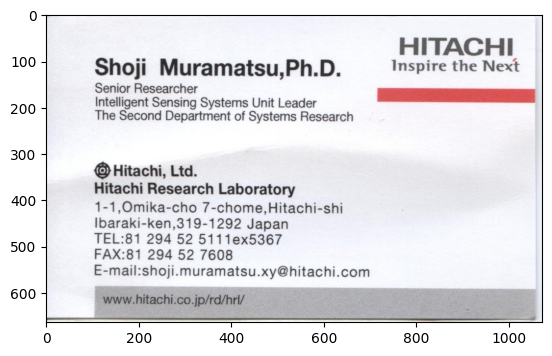

In [ ]:
image = cv2.imread('data/067.jpg')
plt.imshow(image[:,:,::-1])

In [ ]:
model1 = spacy.load(output_dir)

In [ ]:
image = cv2.imread('data/067.jpg')

pydata = pytesseract.image_to_data(image)


data = list(map(lambda a:a.split("\t") , pydata.split('\n')))

data_1 = pd.DataFrame(data[1:] , columns=data[0])
data_1.dropna(inplace=True)
data_1['text'] = data_1['text'].apply(proper)
df = data_1.query('text != "" ')
content = " ".join([i for i in df['text']])
sol = model1(content)

In [ ]:
displacy.render(sol , style='ent')

In [ ]:
soljson = sol.to_json()

In [ ]:
soljson.keys()

dict_keys(['text', 'ents', 'tokens'])

In [ ]:
sol_text = soljson['text']

In [ ]:
soljson['ents']

[{'start': 129, 'end': 137, 'label': 'I-ORG'},
 {'start': 138, 'end': 145, 'label': 'I-ORG'},
 {'start': 146, 'end': 149, 'label': 'I-ORG'},
 {'start': 158, 'end': 166, 'label': 'I-ORG'},
 {'start': 167, 'end': 177, 'label': 'I-ORG'},
 {'start': 272, 'end': 303, 'label': 'B-EMAIL'}]

In [ ]:
soljson['tokens']

[{'id': 0, 'start': 0, 'end': 7},
 {'id': 1, 'start': 8, 'end': 13},
 {'id': 2, 'start': 14, 'end': 26},
 {'id': 3, 'start': 27, 'end': 34},
 {'id': 4, 'start': 35, 'end': 38},
 {'id': 5, 'start': 39, 'end': 43},
 {'id': 6, 'start': 44, 'end': 48},
 {'id': 7, 'start': 49, 'end': 53},
 {'id': 8, 'start': 54, 'end': 55},
 {'id': 9, 'start': 56, 'end': 67},
 {'id': 10, 'start': 68, 'end': 75},
 {'id': 11, 'start': 76, 'end': 83},
 {'id': 12, 'start': 84, 'end': 88},
 {'id': 13, 'start': 89, 'end': 95},
 {'id': 14, 'start': 96, 'end': 99},
 {'id': 15, 'start': 100, 'end': 106},
 {'id': 16, 'start': 107, 'end': 117},
 {'id': 17, 'start': 118, 'end': 120},
 {'id': 18, 'start': 121, 'end': 128},
 {'id': 19, 'start': 129, 'end': 137},
 {'id': 20, 'start': 138, 'end': 145},
 {'id': 21, 'start': 146, 'end': 149},
 {'id': 22, 'start': 150, 'end': 157},
 {'id': 23, 'start': 158, 'end': 166},
 {'id': 24, 'start': 167, 'end': 177},
 {'id': 25, 'start': 178, 'end': 188},
 {'id': 26, 'start': 189, 'en

In [ ]:
df_tokens = pd.DataFrame(soljson['tokens'])

In [ ]:
df_tokens['token'] = df_tokens[['start','end']].apply(
    lambda x:sol_text[x[0]:x[1]] , axis = 1)
df_tokens.head(10)

,id,start,end,token
0,0,0,7,hitachi
1,1,8,13,shoji
2,2,14,26,muramatsuphd
3,3,27,34,inspire
4,4,35,38,the
5,5,39,43,next
6,6,44,48,none
7,7,49,53,evra
8,8,54,55,2
9,9,56,67,intelligent


In [ ]:
sol_text[10:19]

'oji muram'

In [ ]:
k = pd.DataFrame(soljson['ents'])[['start','label']]
df_tokens = pd.merge(df_tokens,k,how='left',on='start')

In [ ]:
df_tokens.head(10)

,id,start,end,token,label
0,0,0,7,hitachi,NaN
1,1,8,13,shoji,NaN
2,2,14,26,muramatsuphd,NaN
3,3,27,34,inspire,NaN
4,4,35,38,the,NaN
5,5,39,43,next,NaN
6,6,44,48,none,NaN
7,7,49,53,evra,NaN
8,8,54,55,2,NaN
9,9,56,67,intelligent,NaN


In [ ]:
df_tokens.fillna('O',inplace=True)
df_tokens.head(10)

,id,start,end,token,label
0,0,0,7,hitachi,O
1,1,8,13,shoji,O
2,2,14,26,muramatsuphd,O
3,3,27,34,inspire,O
4,4,35,38,the,O
5,5,39,43,next,O
6,6,44,48,none,O
7,7,49,53,evra,O
8,8,54,55,2,O
9,9,56,67,intelligent,O


In [ ]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,764,50,254,54,95.878090,hitachi
6,5,1,1,1,2,1,106,94,109,48,91.160225,shoji
7,5,1,1,1,2,2,247,96,390,46,92.027962,muramatsuphd
8,5,1,1,1,2,3,747,98,118,31,96.216446,inspire
9,5,1,1,1,2,4,878,99,53,25,96.973724,the
10,5,1,1,1,2,5,942,100,82,25,96.887581,next
12,5,1,1,1,3,1,106,148,127,23,44.285950,none
13,5,1,1,1,3,2,249,150,79,22,20.349266,evra
14,5,1,1,1,3,3,716,159,343,33,38.894390,2
16,5,1,1,1,4,1,108,178,114,28,96.482742,intelligent


In [ ]:
df['end'] = df['text'].apply(lambda x: len(x)+1).cumsum() - 1 
df['start'] = df[['text','end']].apply(lambda x: x[1] - len(x[0]),axis=1)

In [ ]:
df_c = pd.merge(df,df_tokens[['start','token','label']],how='inner',on='start')

In [ ]:
df_c.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,764,50,254,54,95.878090,hitachi,7,0,hitachi,O
1,5,1,1,1,2,1,106,94,109,48,91.160225,shoji,13,8,shoji,O
2,5,1,1,1,2,2,247,96,390,46,92.027962,muramatsuphd,26,14,muramatsuphd,O
3,5,1,1,1,2,3,747,98,118,31,96.216446,inspire,34,27,inspire,O
4,5,1,1,1,2,4,878,99,53,25,96.973724,the,38,35,the,O
5,5,1,1,1,2,5,942,100,82,25,96.887581,next,43,39,next,O
6,5,1,1,1,3,1,106,148,127,23,44.285950,none,48,44,none,O
7,5,1,1,1,3,2,249,150,79,22,20.349266,evra,53,49,evra,O
8,5,1,1,1,3,3,716,159,343,33,38.894390,2,55,54,2,O
9,5,1,1,1,4,1,108,178,114,28,96.482742,intelligent,67,56,intelligent,O


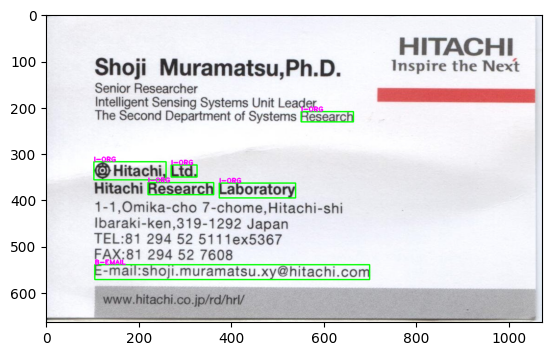

In [ ]:
d = df_c.query("label != 'O' ")
img = image.copy()

for x,y,w,h,label in d[['left','top','width','height','label']].values:
    x = int(x)
    y = int(y)
    w = int(w)
    h = int(h)
    
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img,str(label),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2)
    
plt.imshow(img[:,:,::-1])

    
# cv2.imshow('Predictions',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
d['label'] = d['label'].apply(lambda x: x[2:])
d.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
19,5,1,2,1,1,6,551,210,113,22,96.450989,research,137,129,research,ORG
20,5,1,3,1,1,1,103,318,156,39,23.373970,hitachi,145,138,hitachi,ORG
21,5,1,3,1,1,2,270,325,56,26,89.464485,ltd,149,146,ltd,ORG
23,5,1,3,2,1,2,220,363,142,26,96.736702,research,166,158,research,ORG
24,5,1,3,2,1,3,374,364,165,32,96.426018,laboratory,177,167,laboratory,ORG


In [ ]:

class new():
    def __init__(self):
        self.id = 0
        self.text = ''
        
    def e(self,text):
        if self.text == text:
            return self.id
        else:
            self.id +=1
            self.text = text
            return self.id
        
ob = new()

In [ ]:
d['group'] = d['label'].apply(ob.e)

In [ ]:
d[['left','top','width','height']] = d[['left','top','width','height']].astype(int)
d['right'] = d['left'] + d['width']
d['bottom'] = d['top'] + d['height']

In [ ]:
qq = ['left','top','right','bottom','label','token','group']
x = d[qq].groupby(by='group')

In [ ]:
img_tagging = x.agg({
    
    'left':min,
    'right':max,
    'top':min,
    'bottom':max,
    'label':np.unique,
    'token':lambda k: " ".join(k)
    
})

In [ ]:
img_tagging

,left,right,top,bottom,label,token
group,,,,,,
1,103,664,210,396,[ORG],research hitachi ltd research laboratory
2,105,699,540,572,[EMAIL],emailshojimuramatsuxyhitachicom


In [ ]:
image = cv2.imread("data/067.jpg")

In [ ]:
img_r = image.copy()
for l, r, t, b, label, token in img_tagging.values:
    cv2.rectangle(img_r, (l, t), (r, b), (0, 255, 0), 2)
    
    # Explicitly convert label to string
    label_str = str(label)
    
    cv2.putText(img_r, label_str, (l, t), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 255), 2)
    
# cv2.imshow('img', img_r)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
import re

In [ ]:
a = 'akash123'
sol = re.sub('\d','',a)
sol

'akash'

In [ ]:
def clean(text,label):
    if label == 'PHONE':
        text = text.lower()
        text = re.sub(r'\D','',text)
    elif label == 'EMAIL':
        text = text.lower()
        a_s_c = '@_.\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label == 'WEB':
        text = text.lower()
        a_s_c = ':/.%#\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label in ("NAME","DES"):
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z]','',text)
        text = text.title()
    elif label == "ORG":
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z0-9]','',text)
        text = text.title()
    return text
    
        

In [ ]:
clean("rajput##$singhakashl@&*gmail.,com","EMAIL")

'rajputsinghakashl@gmail.com'

In [ ]:
d.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label,group,right,bottom
19,5,1,2,1,1,6,551,210,113,22,96.450989,research,137,129,research,ORG,1,664,232
20,5,1,3,1,1,1,103,318,156,39,23.373970,hitachi,145,138,hitachi,ORG,1,259,357
21,5,1,3,1,1,2,270,325,56,26,89.464485,ltd,149,146,ltd,ORG,1,326,351
23,5,1,3,2,1,2,220,363,142,26,96.736702,research,166,158,research,ORG,1,362,389
24,5,1,3,2,1,3,374,364,165,32,96.426018,laboratory,177,167,laboratory,ORG,1,539,396


In [ ]:
info_array = df_c.query('label != "O"')[['token','label']].values

In [ ]:
info_array

array([['research', 'I-ORG'],
       ['hitachi', 'I-ORG'],
       ['ltd', 'I-ORG'],
       ['research', 'I-ORG'],
       ['laboratory', 'I-ORG'],
       ['emailshojimuramatsuxyhitachicom', 'B-EMAIL']], dtype=object)

In [ ]:
entities = dict(NAME=[],ORG=[],DES=[],PHONE=[],EMAIL=[],WEB=[])
previous = ''
for tok, lab in info_array:
    bio_tag = lab[:1]
    label_tag = lab[2:]
    
    text = clean(tok,label_tag)
    
    
    
    if previous != label_tag:
        entities[label_tag].append(text)
        
    else:
        if bio_tag == 'B':
            entities[label_tag].append(text)
            
        else:
            if label_tag in ('NAME','ORG','DES'):
                entities[label_tag][-1] = entities[label_tag][-1]+" "+text
                
            else:
                entities[label_tag][-1] = entities[label_tag][-1]+text
            
    previous = label_tag

In [ ]:
entities

{'NAME': [],
 'ORG': ['Research Hitachi Ltd Research Laboratory'],
 'DES': [],
 'PHONE': [],
 'EMAIL': ['emailshojimuramatsuxyhitachicom'],
 'WEB': []}

## Prediction

In [ ]:
import numpy as np
import pandas as pd 
import spacy
import pytesseract
from glob import glob
import re 
import string 
import cv2
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from spacy import displacy

def proper(text):
    spaces = string.whitespace
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    a = str.maketrans('','',spaces)
    b = str.maketrans('','',punctuation)
    text = str(text)
    text = text.lower()
    removewhitespaces = text.translate(a)
    removepun = removewhitespaces.translate(b)

    
    return str(removepun)
#class
class new():
    def __init__(self):
        self.id = 0
        self.text = ''
        
    def e(self,text):
        if self.text == text:
            return self.id
        else:
            self.id +=1
            self.text = text
            return self.id
        
ob = new()

#re
def clean(text,label):
    if label == 'PHONE':
        text = text.lower()
        text = re.sub(r'\D','',text)
    elif label == 'EMAIL':
        text = text.lower()
        a_s_c = '@_.\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label == 'WEB':
        text = text.lower()
        a_s_c = ':/.%#\-'
        text = re.sub(r'[^A-Za-z0-9{} ]'.format(a_s_c),'',text)
    elif label in ("NAME","DES"):
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z]','',text)
        text = text.title()
    elif label == "ORG":
        text = text.lower()
       # a_s_c = '@_.-'
        text = re.sub(r'[^a-z0-9]','',text)
        text = text.title()
    return text


model1 = spacy.load(output_dir)

def getPredictions(image):
    pydata = pytesseract.image_to_data(image)
    #print(pydata)
    data = list(map(lambda a:a.split("\t") , pydata.split('\n')))
    #data
    data_1 = pd.DataFrame(data[1:] , columns=data[0])
    data_1.dropna(inplace=True)
    data_1['text'] = data_1['text'].apply(proper)
    df = data_1.query('text != "" ')
    content = " ".join([i for i in df['text']])
    print(content)
    sol = model1(content)
    #displacy.render(sol , style='ent')
    soljson = sol.to_json()

    soljson.keys()

    sol_text = soljson['text']

    soljson['ents']


    soljson['tokens']

    df_tokens = pd.DataFrame(soljson['tokens'])

    df_tokens['token'] = df_tokens[['start','end']].apply(
        lambda x:sol_text[x[0]:x[1]] , axis = 1)

    k = pd.DataFrame(soljson['ents'])[['start','label']]
    df_tokens = pd.merge(df_tokens,k,how='left',on='start')



    df_tokens.fillna('O',inplace=True)
    df['end'] = df['text'].apply(lambda x: len(x)+1).cumsum() - 1 
    df['start'] = df[['text','end']].apply(lambda x: x[1] - len(x[0]),axis=1)

    df_c = pd.merge(df,df_tokens[['start','token','label']],how='inner',on='start')

    d = df_c.query("label != 'O' ")
  

    d['label'] = d['label'].apply(lambda x: x[2:])

    d['group'] = d['label'].apply(ob.e)


    # In[172]:


    d[['left','top','width','height']] = d[['left','top','width','height']].astype(int)
    d['right'] = d['left'] + d['width']
    d['bottom'] = d['top'] + d['height']


    # In[173]:


    qq = ['left','top','right','bottom','label','token','group']
    x = d[qq].groupby(by='group')


    # In[174]:


    img_tagging = x.agg({

        'left':min,
        'right':max,
        'top':min,
        'bottom':max,
        'label':np.unique,
        'token':lambda k: " ".join(k)

    })


    img_r = image.copy()
    for l, r, t, b, label, token in img_tagging.values:
        cv2.rectangle(img_r, (l, t), (r, b), (0, 255, 0), 2)
    
    # Explicitly convert label to string
    label_str = str(label)
    
    cv2.putText(img_r, label_str, (l, t), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 255), 2)

    clean("rajput##$singhakash@&*gmail.,com","EMAIL")

    info_array = df_c.query('label != "O"')[['token','label']].values

    entities = dict(NAME=[],ORG=[],DES=[],PHONE=[],EMAIL=[],WEB=[])
    previous = ''
    for tok, lab in info_array:
        bio_tag = lab[:1]
        label_tag = lab[2:]

        text = clean(tok,label_tag)



        if previous != label_tag:
            entities[label_tag].append(text)

        else:
            if bio_tag == 'B':
                entities[label_tag].append(text)

            else:
                if label_tag in ('NAME','ORG','DES'):
                    entities[label_tag][-1] = entities[label_tag][-1]+" "+text

                else:
                    entities[label_tag][-1] = entities[label_tag][-1]+text

        previous = label_tag

    #print(entities)
    return img_r , entities


In [ ]:
img = cv2.imread("data/004.jpg")

# cv2.imshow("original",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
result, k1 = getPredictions(img)
print(k1)



stanford electrical bngineering vijay chandrasekhar electrical engineering 17 comstock circle apt 101 stanford ca 94305 phone 9162210411 email vijaycstanfordedu
{'NAME': ['Vijay Chandrasekhar'], 'ORG': [], 'DES': [], 'PHONE': ['9162210411'], 'EMAIL': ['vijaycstanfordedu'], 'WEB': []}


In [ ]:
import cv2

In [ ]:
a1 = cv2.imwrite('./predicted results/testimage13.png',result)

In [ ]:
import PyPDF2

In [ ]:
text = pytesseract.image_to_string('data/business_cards/business_cards/Canon/002.jpg')
text

'MEXICAN GRILL\n\nCHRIS SALCEDO\nAPPRENTICE\n\npirect 650.462.9154 CHIPOTLE MEXICAN GRILL, INC.\n\n675 EL CAMINO REAL\n50.462.1252 2\nos : PALO ALTO, CA 94306\n\n'

In [ ]:
import string

In [ ]:
def new(text):
    spaces = string.whitespace
    punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~\n®'
    s = ''.join([i for i in text if i not in punctuation])
    text = str(s)
    text = text.lower()
    return text

In [ ]:
doc = new(text)

In [ ]:
doc

'mexican grillchris salcedoapprenticepirect 650.462.9154 chipotle mexican grill inc.675 el camino real50.462.1252 2os  palo alto ca 94306'

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(doc)

In [ ]:
for i in doc.ents:
    print(i.text , i.label_)

mexican NORP
salcedoapprenticepirect 650.462.9154 PRODUCT
mexican NORP
el camino ORG
2os ORDINAL
palo alto GPE
94306 DATE


In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc,style = 'ent')